# Comparision of Support Vector Classifier vs Quantum Kernelized Support Vector Classifier Algorithms for WDBC Classification dataset

#### Here QSVC implementation is done using Qiskit Ecosystem

#### Reference link:- <a href="https://qiskit-community.github.io/qiskit-machine-learning/index.html">https://qiskit-community.github.io/qiskit-machine-learning/index.htmlt</a>

## Dataset:-

#### Dataset is taken from Pen Machine Learning Benchmarks (PMLB) library

#### Documentation of dataset:- <a href="https://github.com/EpistasisLab/pmlb/blob/master/README.md">https://github.com/EpistasisLab/pmlb/blob/master/README.md</a>

In [1]:
from pmlb import fetch_data

In [2]:
wdbc = fetch_data("wdbc")  #wdbc is the dataframe we get

In [3]:
wdbc.head() 

Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0    17.99     10.38      122.80  1001.0        0.118         0.278   
1    20.57     17.77      132.90  1326.0        0.085         0.079   
2    19.69     21.25      130.00  1203.0        0.110         0.160   
3    11.42     20.38       77.58   386.1        0.142         0.284   
4    20.29     14.34      135.10  1297.0        0.100         0.133   

   Concavity1  Concave_points1  Symmetry1  Fractal_dimension1  ...  Texture3  \
0       0.300            0.147      0.242               0.079  ...     17.33   
1       0.087            0.070      0.181               0.057  ...     23.41   
2       0.197            0.128      0.207               0.060  ...     25.53   
3       0.241            0.105      0.260               0.097  ...     26.50   
4       0.198            0.104      0.181               0.059  ...     16.67   

   Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  Concave_points3  \
0      184.60  2019.0        0.162         0.666       0.712            0.265   
1      158.80  1956.0        0.124         0.187       0.242            0.186   
2      152.50  1709.0        0.144         0.424       0.450            0.243   
3       98.87   567.7        0.210         0.866       0.687            0.258   
4      152.20  1575.0        0.137         0.205       0.400            0.162   

   Symmetry3  Fractal_dimension3  target  
0      0.460               0.119       1  
1      0.275               0.089       1  
2      0.361               0.088       1  
3      0.664               0.173       1  
4      0.236               0.077       1  

[5 rows x 31 columns]

In [4]:
wdbc.shape

(569, 31)

In [5]:
wdbc.describe()

Radius1    Texture1  Perimeter1        Area1  Smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096388   
std      3.524049    4.301036   24.298981   351.914129     0.014062   
min      6.981000    9.710000   43.790000   143.500000     0.053000   
25%     11.700000   16.170000   75.170000   420.300000     0.086000   
50%     13.370000   18.840000   86.240000   551.100000     0.096000   
75%     15.780000   21.800000  104.100000   782.700000     0.105000   
max     28.110000   39.280000  188.500000  2501.000000     0.163000   

       Compactness1  Concavity1  Concave_points1   Symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104344    0.088819         0.048935    0.181188   
std        0.052816    0.079702         0.038798    0.027435   
min        0.019000    0.000000         0.000000    0.106000   
25%        0.065000    0.030000         0.020000    0.162000   
50%        0.093000    0.062000         0.034000    0.179000   
75%        0.130000    0.131000         0.074000    0.196000   
max        0.345000    0.427000         0.201000    0.304000   

       Fractal_dimension1  ...    Texture3  Perimeter3        Area3  \
count          569.000000  ...  569.000000  569.000000   569.000000   
mean             0.062798  ...   25.677223  107.261213   880.583128   
std              0.007076  ...    6.146258   33.602542   569.356993   
min              0.050000  ...   12.020000   50.410000   185.200000   
25%              0.058000  ...   21.080000   84.110000   515.300000   
50%              0.062000  ...   25.410000   97.660000   686.500000   
75%              0.066000  ...   29.720000  125.400000  1084.000000   
max              0.097000  ...   49.540000  251.200000  4254.000000   

       Smoothness3  Compactness3  Concavity3  Concave_points3   Symmetry3  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.132369      0.254279    0.272190         0.114610    0.290083   
std       0.022819      0.157333    0.208633         0.065726    0.061872   
min       0.071000      0.027000    0.000000         0.000000    0.156000   
25%       0.117000      0.147000    0.114000         0.065000    0.250000   
50%       0.131000      0.212000    0.227000         0.100000    0.282000   
75%       0.146000      0.339000    0.383000         0.161000    0.318000   
max       0.223000      1.058000    1.252000         0.291000    0.664000   

       Fractal_dimension3      target  
count          569.000000  569.000000  
mean             0.083953    0.372583  
std              0.018073    0.483918  
min              0.055000    0.000000  
25%              0.071000    0.000000  
50%              0.080000    0.000000  
75%              0.092000    1.000000  
max              0.208000    1.000000  

[8 rows x 31 columns]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

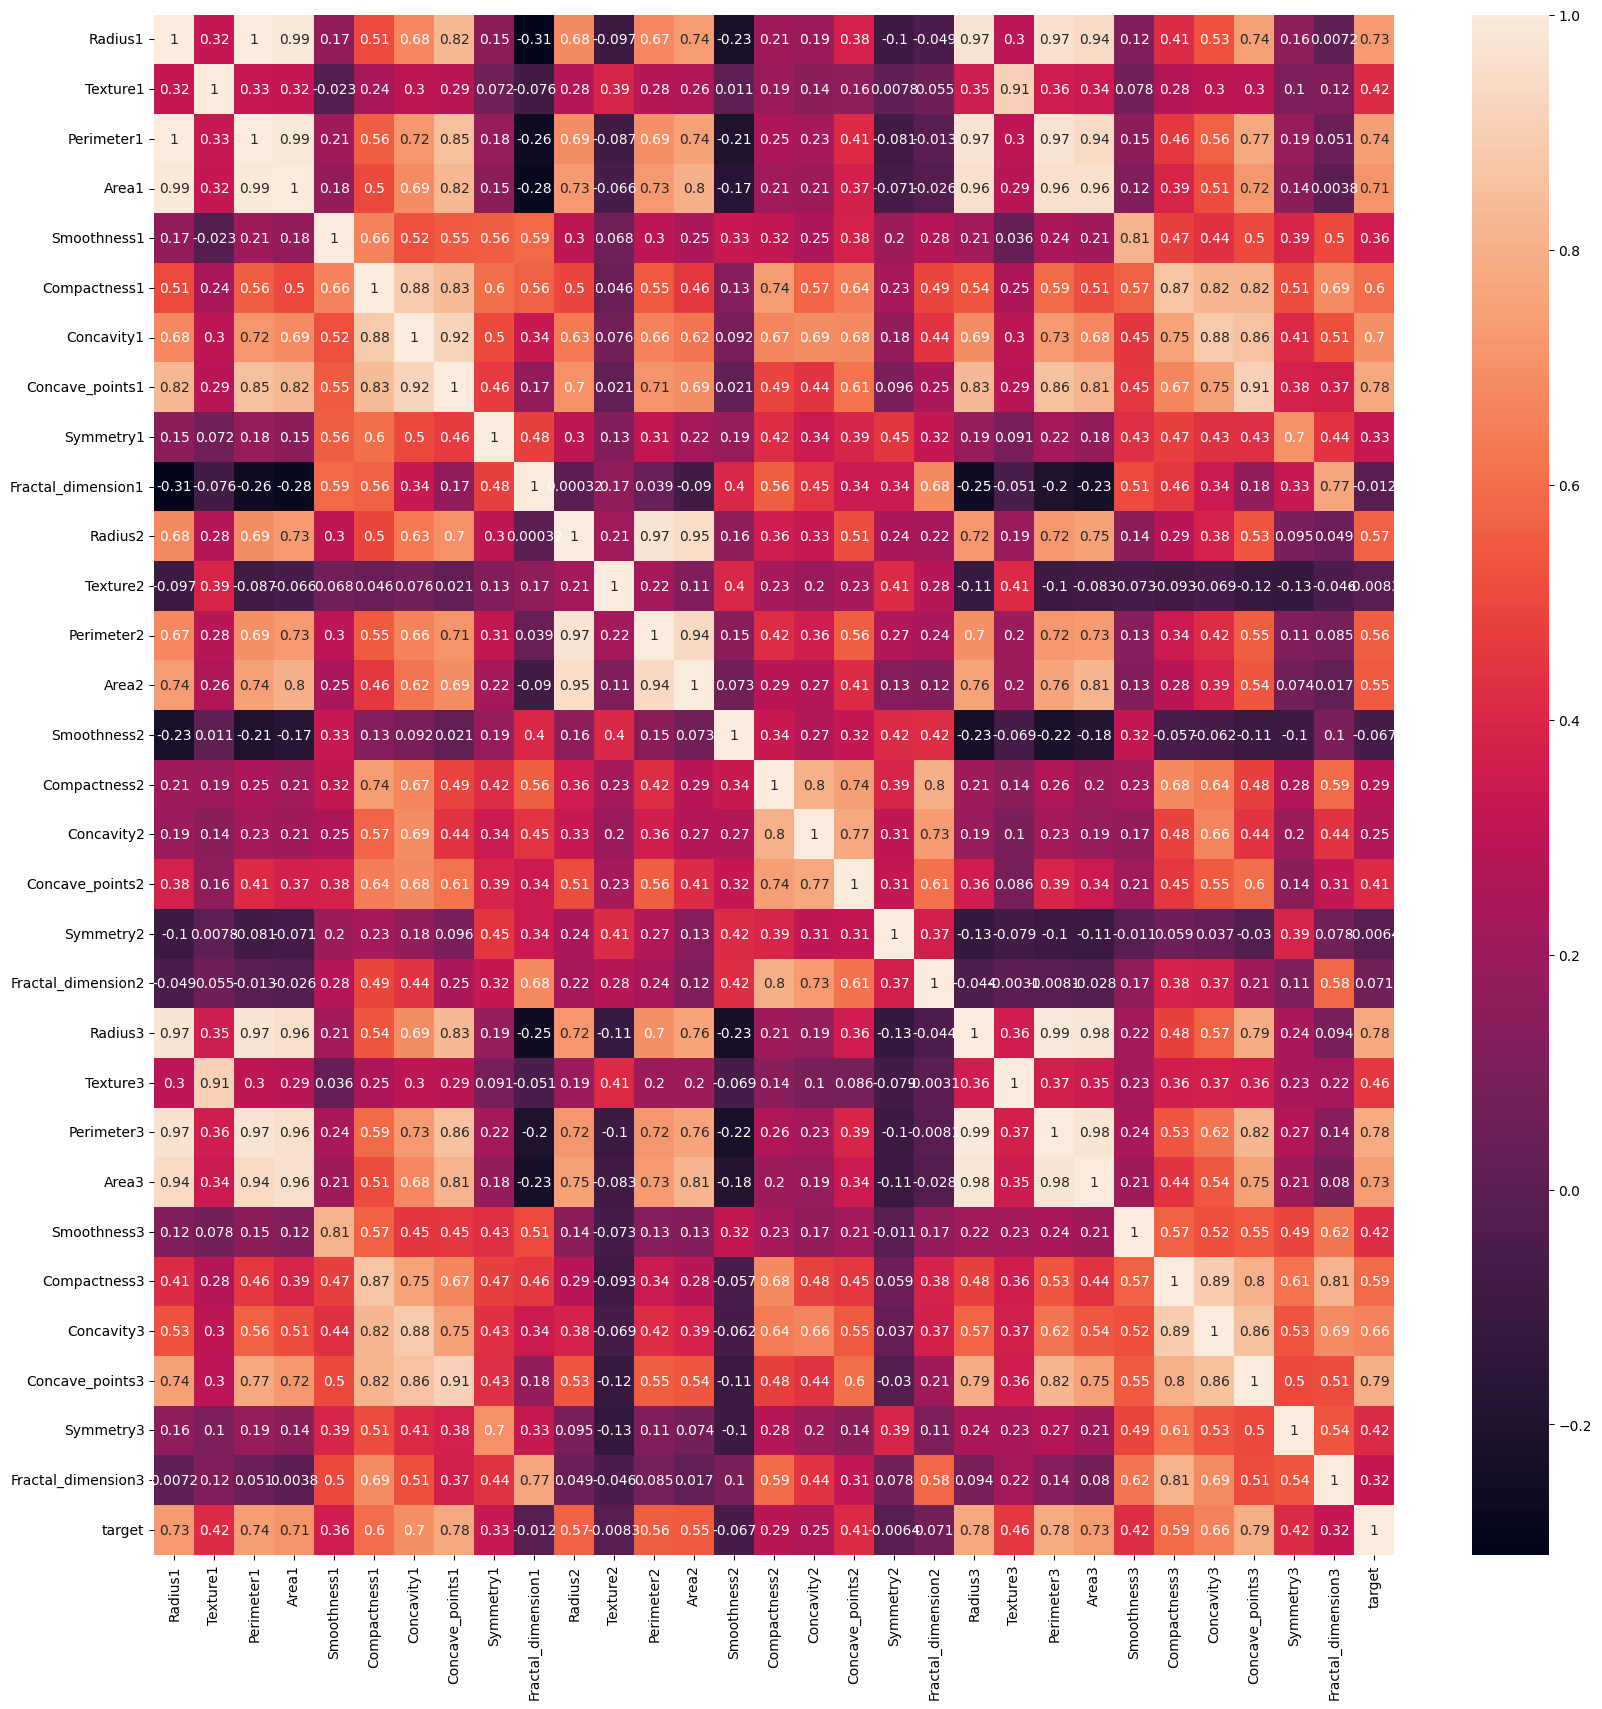

In [7]:
#getting correlation matrix to observe correlation between features 

corr = wdbc.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [8]:
# This is a higly correlated data so we can delete one of pairs of highly correlated features

import pandas as pd
import numpy as np

# Step 1: find correlation matrix
df = wdbc
corr_matrix = df.corr().abs()

# Step 2: Identify highly correlated features
# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find index of feature columns with correlation greater than a threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Step 4: Drop highly correlated features
df_reduced = df.drop(columns=to_drop)

In [9]:
df_reduced.shape

(569, 18)

In [10]:
df_reduced.head()

Radius1  Texture1  Smoothness1  Compactness1  Symmetry1  \
0    17.99     10.38        0.118         0.278      0.242   
1    20.57     17.77        0.085         0.079      0.181   
2    19.69     21.25        0.110         0.160      0.207   
3    11.42     20.38        0.142         0.284      0.260   
4    20.29     14.34        0.100         0.133      0.181   

   Fractal_dimension1  Radius2  Texture2  Smoothness2  Compactness2  \
0               0.079    1.095     0.905        0.006         0.049   
1               0.057    0.544     0.734        0.005         0.013   
2               0.060    0.746     0.787        0.006         0.040   
3               0.097    0.496     1.156        0.009         0.075   
4               0.059    0.757     0.781        0.011         0.025   

   Concavity2  Concave_points2  Symmetry2  Fractal_dimension2  Smoothness3  \
0       0.054            0.016      0.030               0.006        0.162   
1       0.019            0.013      0.014               0.004        0.124   
2       0.038            0.021      0.022               0.005        0.144   
3       0.057            0.019      0.060               0.009        0.210   
4       0.057            0.019      0.018               0.005        0.137   

   Symmetry3  Fractal_dimension3  target  
0      0.460               0.119       1  
1      0.275               0.089       1  
2      0.361               0.088       1  
3      0.664               0.173       1  
4      0.236               0.077       1

<Axes: >

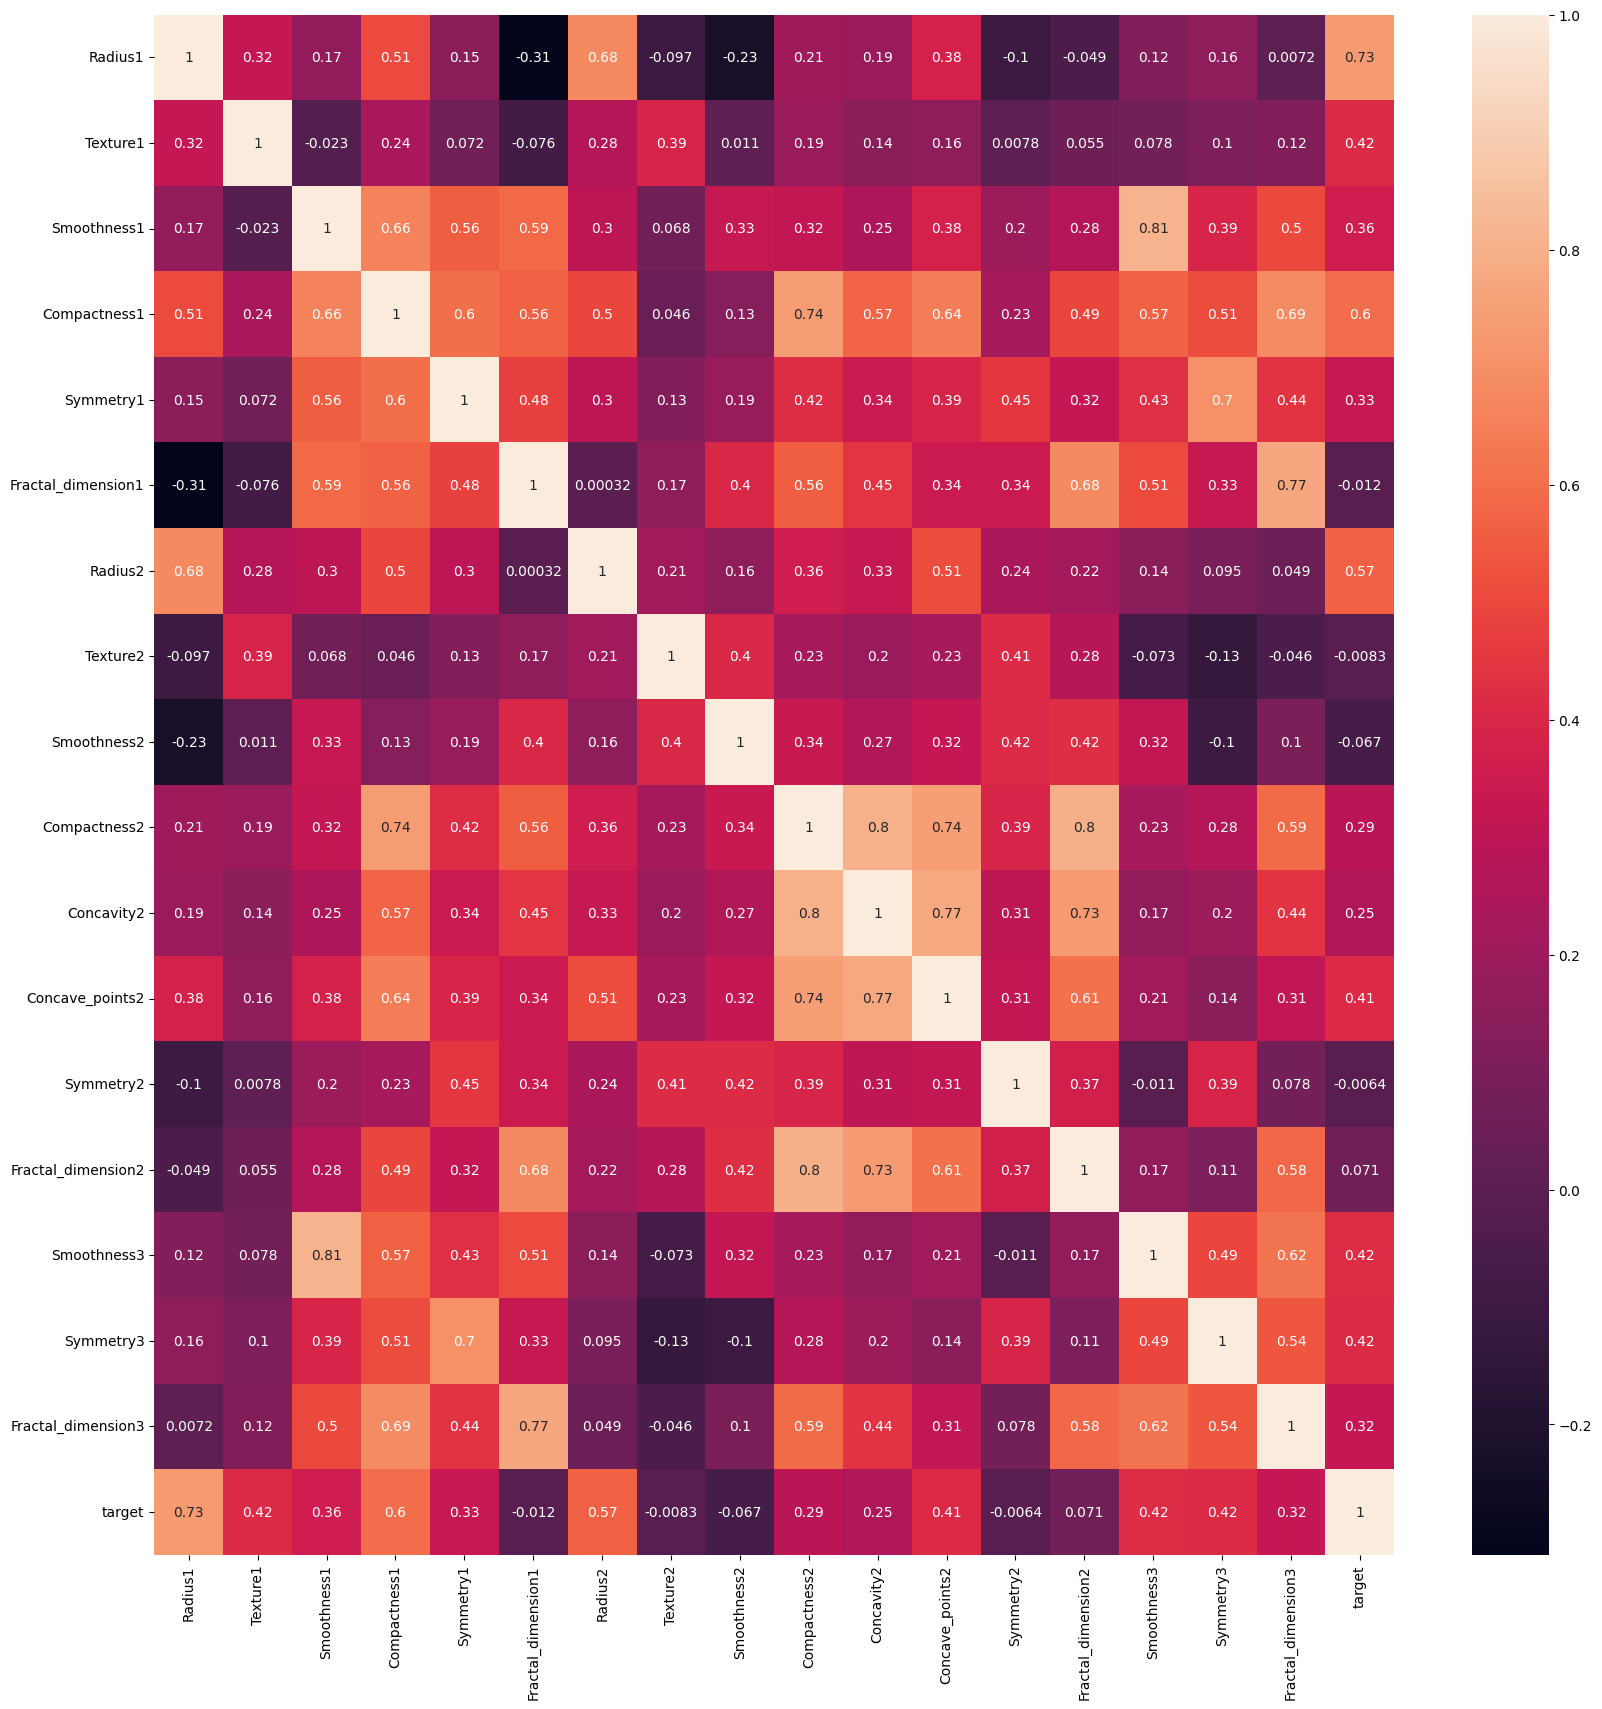

In [11]:
corr = df_reduced.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [12]:
df_reduced.isnull().sum()

Radius1               0
Texture1              0
Smoothness1           0
Compactness1          0
Symmetry1             0
Fractal_dimension1    0
Radius2               0
Texture2              0
Smoothness2           0
Compactness2          0
Concavity2            0
Concave_points2       0
Symmetry2             0
Fractal_dimension2    0
Smoothness3           0
Symmetry3             0
Fractal_dimension3    0
target                0
dtype: int64

<Axes: xlabel='Radius1', ylabel='Count'>

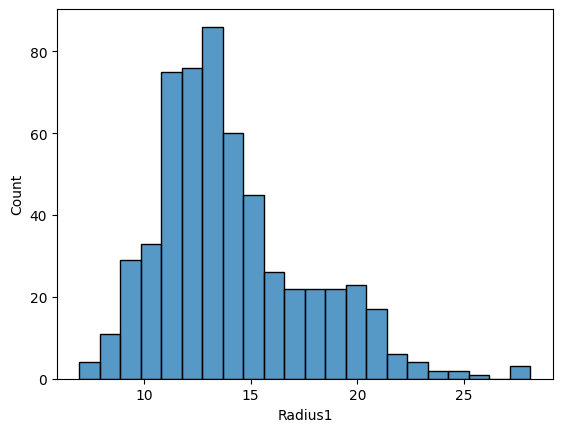

In [13]:
sns.histplot(df_reduced['Radius1'])

<Axes: xlabel='Radius2', ylabel='Count'>

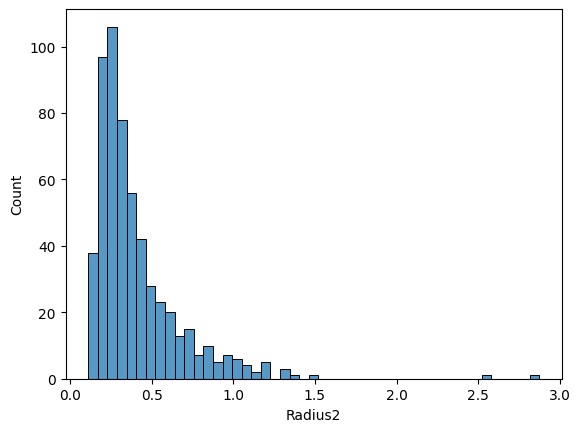

In [14]:
sns.histplot(df_reduced['Radius2'])

<Axes: xlabel='Compactness1', ylabel='Count'>

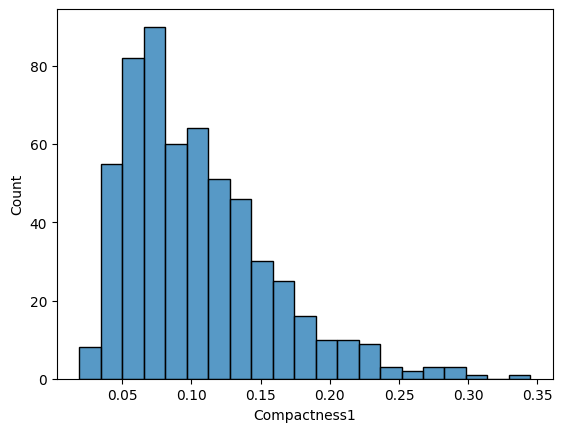

In [15]:
sns.histplot(df_reduced['Compactness1'])	

In [16]:
# Get the features and labels i.e., X,Y for our models.

features = df_reduced.drop('target', axis =1)

In [17]:
features

Radius1  Texture1  Smoothness1  Compactness1  Symmetry1  \
0      17.99     10.38        0.118         0.278      0.242   
1      20.57     17.77        0.085         0.079      0.181   
2      19.69     21.25        0.110         0.160      0.207   
3      11.42     20.38        0.142         0.284      0.260   
4      20.29     14.34        0.100         0.133      0.181   
..       ...       ...          ...           ...        ...   
564    21.56     22.39        0.111         0.116      0.173   
565    20.13     28.25        0.098         0.103      0.175   
566    16.60     28.08        0.085         0.102      0.159   
567    20.60     29.33        0.118         0.277      0.240   
568     7.76     24.54        0.053         0.044      0.159   

     Fractal_dimension1  Radius2  Texture2  Smoothness2  Compactness2  \
0                 0.079    1.095     0.905        0.006         0.049   
1                 0.057    0.544     0.734        0.005         0.013   
2                 0.060    0.746     0.787        0.006         0.040   
3                 0.097    0.496     1.156        0.009         0.075   
4                 0.059    0.757     0.781        0.011         0.025   
..                  ...      ...       ...          ...           ...   
564               0.056    1.176     1.256        0.010         0.029   
565               0.055    0.766     2.463        0.006         0.024   
566               0.056    0.456     1.075        0.006         0.037   
567               0.070    0.726     1.595        0.007         0.062   
568               0.059    0.386     1.428        0.007         0.005   

     Concavity2  Concave_points2  Symmetry2  Fractal_dimension2  Smoothness3  \
0         0.054            0.016      0.030               0.006        0.162   
1         0.019            0.013      0.014               0.004        0.124   
2         0.038            0.021      0.022               0.005        0.144   
3         0.057            0.019      0.060               0.009        0.210   
4         0.057            0.019      0.018               0.005        0.137   
..          ...              ...        ...                 ...          ...   
564       0.052            0.025      0.011               0.004        0.141   
565       0.040            0.017      0.019               0.002        0.117   
566       0.047            0.016      0.013               0.004        0.114   
567       0.071            0.017      0.023               0.006        0.165   
568       0.000            0.000      0.027               0.003        0.090   

     Symmetry3  Fractal_dimension3  
0        0.460               0.119  
1        0.275               0.089  
2        0.361               0.088  
3        0.664               0.173  
4        0.236               0.077  
..         ...                 ...  
564      0.206               0.071  
565      0.257               0.066  
566      0.222               0.078  
567      0.409               0.124  
568      0.287               0.070  

[569 rows x 17 columns]

In [18]:
labels = df_reduced['target']

In [19]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [20]:
'''Firstly, we’ll normalize the features. Namely, we will apply a simple transformation to represent all features on the same scale. 
   In our case, we squeeze all features onto the interval (0,1) 
   Normalization is a common technique in machine learning and often leads to better numerical stability and convergence of an algorithm.
   We can use MinMaxScaler from scikit-learn to perform this. Without specifying parameters, this does exactly what is required: maps data onto (0,1)
'''

from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

<Axes: >

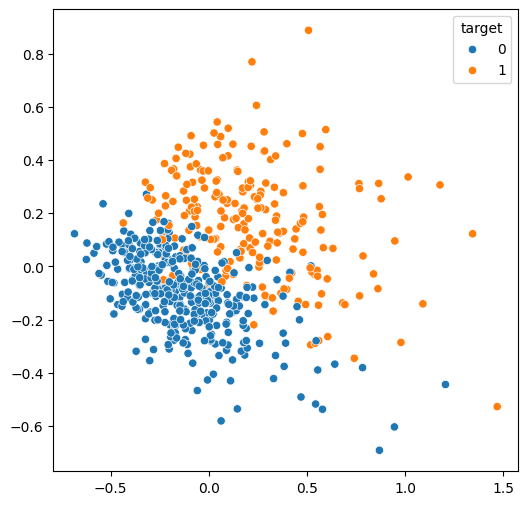

In [21]:
# We are performing Principle component analysis on our data.
# We transform our four features into two features only.

from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

In [22]:
features.shape

(569, 2)

In [23]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [24]:
#Splitting data into training and testing data.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 21)

x_train

array([[-3.36052430e-01, -5.77700981e-03],
       [ 4.83079149e-01,  1.85331532e-01],
       [ 5.95541572e-01,  5.13972927e-01],
       [ 1.13979458e-03, -6.00250314e-02],
       [-2.47956553e-01,  7.76312638e-02],
       [-6.70820071e-03, -4.26749166e-01],
       [ 2.35580152e-02, -9.18272366e-02],
       [-6.08350971e-02, -1.84244877e-01],
       [-1.79017237e-01,  3.66344176e-01],
       [-1.93262264e-01,  1.30906758e-02],
       [ 5.78945411e-01, -5.36891857e-01],
       [-2.23433387e-01, -1.70377163e-01],
       [ 1.58896340e-01, -1.08701894e-01],
       [ 6.32124241e-01,  6.77588027e-02],
       [-2.02069136e-01, -3.10328811e-01],
       [-6.84114838e-01,  1.22768960e-01],
       [-3.22669063e-01, -2.73869997e-01],
       [ 5.78434096e-01,  1.95045020e-01],
       [-4.37887717e-01,  7.86603853e-02],
       [ 3.39386170e-01,  1.73694597e-01],
       [-8.60722773e-02, -2.85727533e-02],
       [ 2.86346773e-01, -1.08876364e-01],
       [ 7.85313603e-01,  3.93267969e-02],
       [-1.

In [25]:
x_train.shape

(455, 2)

In [26]:
x_test.shape

(114, 2)

In [27]:
y_train.shape

(455,)

# Classical SVC

<h3> Using SVC from Scikit Learn for classification of data</h3>

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [2, 3, 4],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
}

grid = GridSearchCV( SVC(), param_grid, refit = True)
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
grid.best_estimator_

SVC(C=100, degree=2, gamma=0.01)

In [30]:
svc = SVC(C=100, degree=2, gamma=0.01)
svc.fit(x_train, y_train)

svc_score = svc.score(x_test,y_test)

print(f"SVC classification test score: {svc_score}")

SVC classification test score: 0.9035087719298246


<h2>We get an Test score of 0.90 for SVC</h2>

In [31]:
y_pred1 = svc.predict(x_test)

In [32]:
y_pred1

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [33]:
y_test

550    0
147    0
4      1
77     1
339    1
      ..
212    1
446    1
529    0
175    0
172    1
Name: target, Length: 114, dtype: int64

In [34]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_pred1)
print(loss)

3.477896379651655


# Defining the quantum kernel

<h4>The next step is to create a quantum kernel instance that will help classify this data.


We use the FidelityQuantumKernel class, and pass two input arguments to its constructor:

feature_map: in this case, a two-qubit ZZFeatureMap.

fidelity: in this case, the ComputeUncompute fidelity subroutine that leverages the Sampler primitive.

NOTE: If you don’t pass a Sampler or Fidelity instance, then the instances of the reference Sampler and ComputeUncompute classes (found in qiskit.primitives) will be created by default.</h4>

In [35]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

new_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

new_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=new_feature_map)

## Implementing QSVC using Quantum Kernel

In [36]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=new_kernel)

qsvc.fit(x_train, y_train)

qsvc_score = qsvc.score(x_test, y_test)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.8947368421052632


<h2> We get a test score of 0.89 in QSVC </h2>

In [37]:
y_pred2 = qsvc.predict(x_test)

In [38]:
y_pred2

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [39]:
y_test

550    0
147    0
4      1
77     1
339    1
      ..
212    1
446    1
529    0
175    0
172    1
Name: target, Length: 114, dtype: int64

In [40]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_pred2)
print(loss)

3.794068777801805


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

# Final Accuracy, Precision, Recall Scores and Confusion Matrix for SVC.

In [42]:
evaluating_model(y_test, y_pred1) #for SVC

Accuracy Score:-  0.9035087719298246
Precision Score:-  0.9375
Recall Score:-  0.7692307692307693
Confusion Matrix:- 
 [[73  2]
 [ 9 30]]


# Final Accuracy, Precision, Recall Scores and Confusion Matrix for QSVC.

In [43]:
evaluating_model(y_test, y_pred2) #for QSVC

Accuracy Score:-  0.8947368421052632
Precision Score:-  0.9090909090909091
Recall Score:-  0.7692307692307693
Confusion Matrix:- 
 [[72  3]
 [ 9 30]]


## Trying different Feature Maps for encoding data

In [44]:
from qiskit.circuit.library import ZFeatureMap, PauliFeatureMap

# Experiment with different feature maps
feature_maps = [
    ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear"),
    ZFeatureMap(feature_dimension=2, reps=2),
    PauliFeatureMap(feature_dimension=2, reps=2, paulis=['Z', 'X']),
]

for fm in feature_maps:
    new_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=fm)
    qsvc = QSVC(quantum_kernel=new_kernel)
    qsvc.fit(x_train, y_train)
    qsvc_score = qsvc.score(x_test, y_test)
    print(f"QSVC classification test score with {fm.__class__.__name__}: {qsvc_score}")


QSVC classification test score with ZZFeatureMap: 0.8947368421052632
QSVC classification test score with ZFeatureMap: 0.9035087719298246
QSVC classification test score with PauliFeatureMap: 0.868421052631579


## ZFeatureMap out of others gave the best test score so we are going to do Hyperparamter tuning for ZfeatureMap parameters and build a quantum kernel

In [45]:
reps_list = [1, 2, 3]

# Initialize variables to track the best parameters and score
best_score = 0
best_params = {}

for reps in reps_list:
    print(f"Testing reps={reps}")
    
    # Create a new feature map with the current reps
    feature_map = ZFeatureMap(feature_dimension=2, reps=reps)
    
    # Create a new kernel with the updated feature map
    new_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
    
    # Initialize and train the QSVC model
    qsvc = QSVC(quantum_kernel=new_kernel)
    qsvc.fit(x_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = qsvc.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print(f"Score for reps={reps}: {score}")
    
    # Update the best score and parameters if the current model is better
    if score > best_score:
        best_score = score
        best_params = {'reps': reps}

print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)


Testing reps=1
Score for reps=1: 0.8947368421052632
Testing reps=2
Score for reps=2: 0.9035087719298246
Testing reps=3
Score for reps=3: 0.9035087719298246
Best parameters found: {'reps': 2}
Best cross-validation score: 0.9035087719298246


In [46]:
# Train the best model
best_feature_map = ZFeatureMap(feature_dimension=2, reps=best_params['reps'])
best_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=best_feature_map)
qsvc_best = QSVC(quantum_kernel=best_kernel)
qsvc_best.fit(x_train, y_train)
qsvc_best_score = qsvc_best.score(x_test, y_test)

print(f"QSVC classification test score after hyperparameter tuning: {qsvc_best_score}")

QSVC classification test score after hyperparameter tuning: 0.9035087719298246


In [47]:
y_pred_best = qsvc_best.predict(x_test)

In [48]:
y_pred_best

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [49]:
y_test

550    0
147    0
4      1
77     1
339    1
      ..
212    1
446    1
529    0
175    0
172    1
Name: target, Length: 114, dtype: int64

In [50]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_pred_best)
print(loss)

3.477896379651655


#### Loss is reduced from 3.794 to 3.477 and Score of the model is improved from 0.89 to 0.90

In [51]:
import qiskit_machine_learning.kernels
qsvc_best.quantum_kernel

## Decomposition of Featuremap tp gates

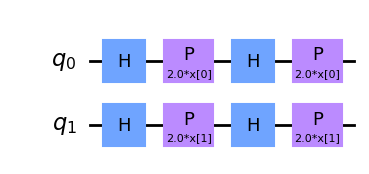

In [52]:
best_feature_map.decompose().draw(output="mpl", style="clifford", fold=20) ## ZFeaturemap with 2 reps

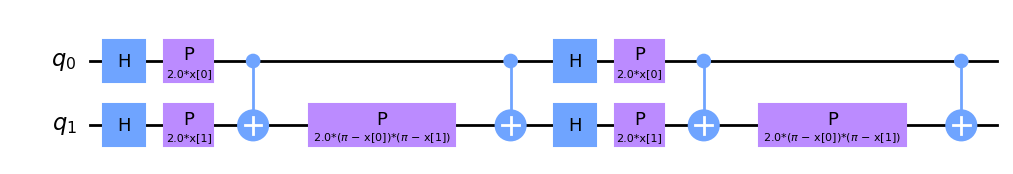

In [53]:
new_feature_map.decompose().draw(output="mpl", style="clifford", fold=20) ## ZZFeaturemap with 2 reps

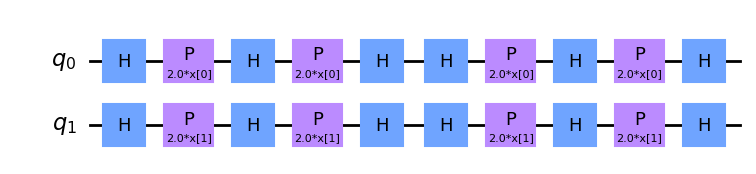

In [58]:
pauli_feature_map = PauliFeatureMap(feature_dimension=2, reps=2, paulis=['Z', 'X'])
pauli_feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

## Plotting the Kernel Matrix's for different Feature Maps

In [54]:
best_matrix = best_kernel.evaluate(x_vec= x_train)

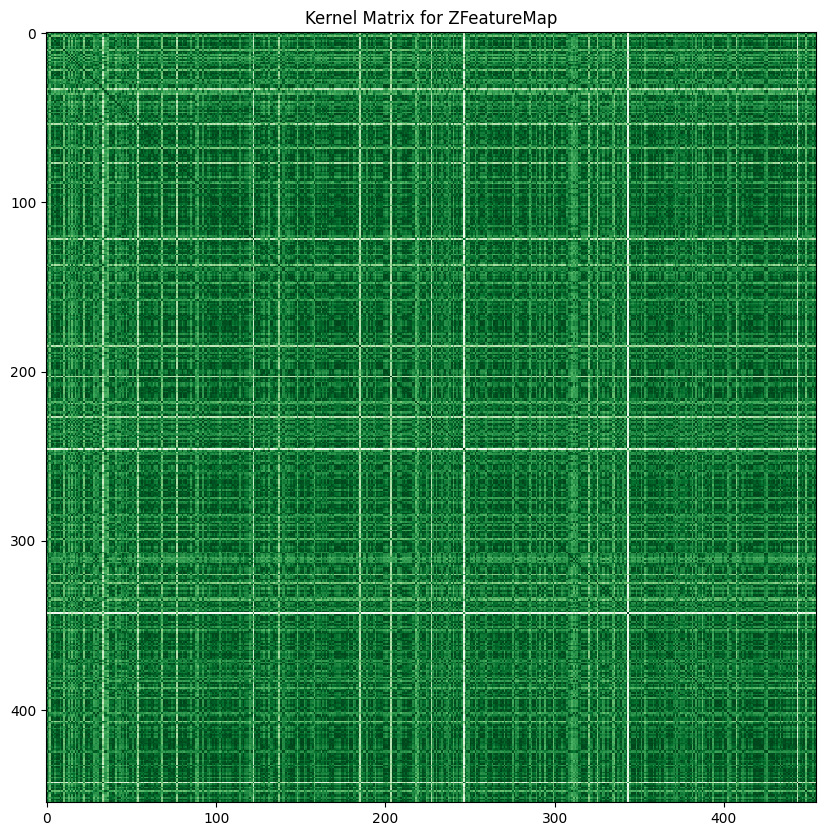

In [55]:
%matplotlib inline

plt.figure(figsize=(20, 10))
plt.imshow(np.asmatrix(best_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Kernel Matrix for ZFeatureMap")
plt.show()

In [56]:
second_matrix = new_kernel.evaluate(x_vec= x_train)

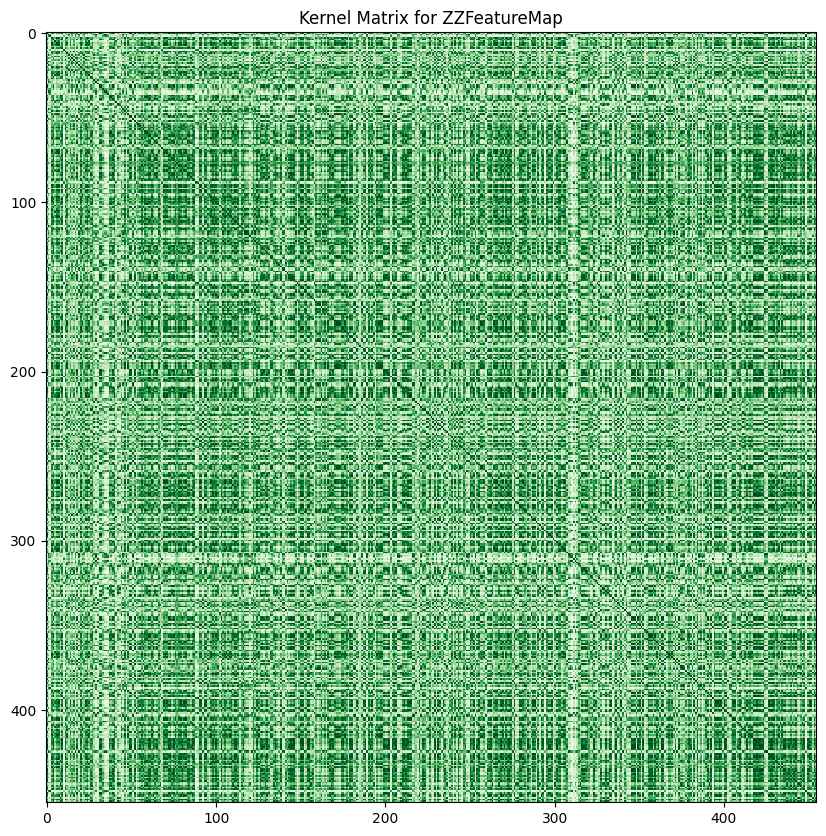

In [57]:

plt.figure(figsize=(20, 10))
plt.imshow(np.asmatrix(second_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Kernel Matrix for ZZFeatureMap")
plt.show()

In [59]:
pauli_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=pauli_feature_map)
pauli_matrix = pauli_kernel.evaluate(x_vec = x_train)

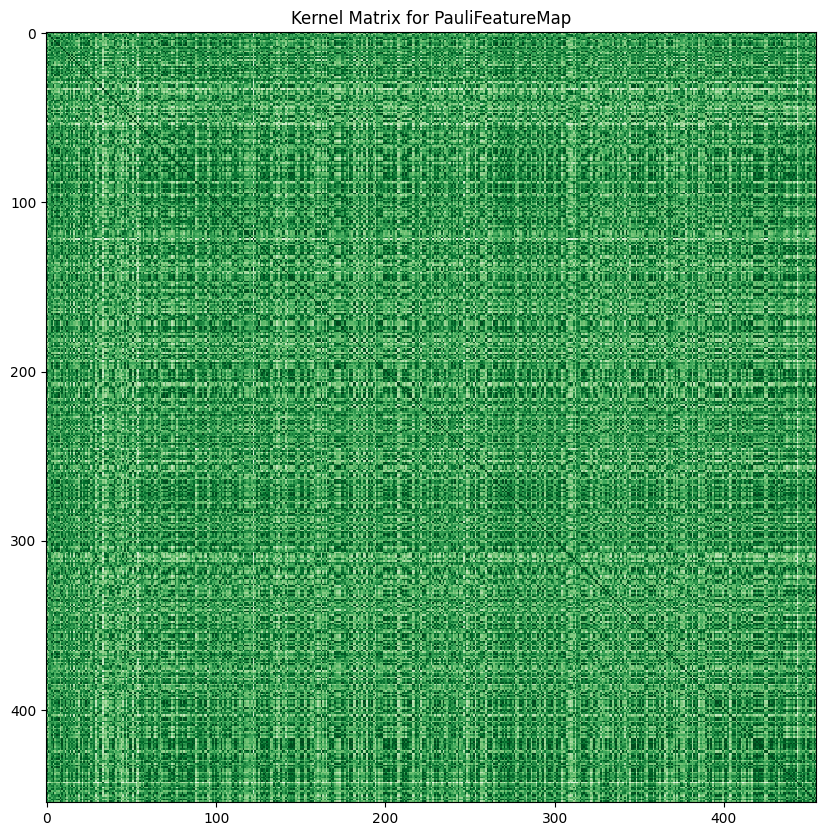

In [60]:
plt.figure(figsize=(20, 10))
plt.imshow(np.asmatrix(pauli_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Kernel Matrix for PauliFeatureMap")
plt.show()